In [1]:
%matplotlib inline

In [2]:
import os
from astropy.io import fits as py
import numpy as np
import matplotlib.pyplot as plt

#from scipy.interpolate import interp1d

plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 25

In [10]:
# Read the files
path = '/Users/ricardoramirez/reflex_data/PersonalReduction/Reduce1/'

In [11]:
frame_spec = []
frame_error_spec = []
frame_WL = []

for i in range(100):
    print         (path + str(i+100) + "/cr2res_obs_staring_extracted.fits")
    fits = py.open(path + str(i+100) + "/cr2res_obs_staring_extracted.fits")
    raw_data1 = fits[1].data
    raw_data2 = fits[2].data
    raw_data3 = fits[3].data
    
    spec       = [[] for i in range(21)]
    error_spec = [[] for i in range(21)]
    WL         = [[] for i in range(21)]
    
    for a in range(2048):
        for b in range(6):
            spec[b].        append(raw_data1[a][b*3])
            error_spec[b].  append(raw_data1[a][b*3+1])
            WL[b].          append(raw_data1[a][b*3+2])
        for b in range(6):
            spec[b+6].      append(raw_data2[a][b*3])
            error_spec[b+6].append(raw_data2[a][b*3+1])
            WL[b+6].        append(raw_data2[a][b*3+2])
        for b in range(6):
            try:
                spec[b+12]. append(raw_data3[a][b*3])
            except: break
            error_spec[b+6].append(raw_data3[a][b*3+1])
            WL[b+12].       append(raw_data3[a][b*3+2])
            
    frame_spec.append(spec)
    frame_error_spec.append(error_spec)
    frame_WL.append(WL)

/Users/ricardoramirez/reflex_data/PersonalReduction/Reduce1/100/cr2res_obs_staring_extracted.fits
/Users/ricardoramirez/reflex_data/PersonalReduction/Reduce1/101/cr2res_obs_staring_extracted.fits
/Users/ricardoramirez/reflex_data/PersonalReduction/Reduce1/102/cr2res_obs_staring_extracted.fits
/Users/ricardoramirez/reflex_data/PersonalReduction/Reduce1/103/cr2res_obs_staring_extracted.fits
/Users/ricardoramirez/reflex_data/PersonalReduction/Reduce1/104/cr2res_obs_staring_extracted.fits
/Users/ricardoramirez/reflex_data/PersonalReduction/Reduce1/105/cr2res_obs_staring_extracted.fits
/Users/ricardoramirez/reflex_data/PersonalReduction/Reduce1/106/cr2res_obs_staring_extracted.fits
/Users/ricardoramirez/reflex_data/PersonalReduction/Reduce1/107/cr2res_obs_staring_extracted.fits
/Users/ricardoramirez/reflex_data/PersonalReduction/Reduce1/108/cr2res_obs_staring_extracted.fits


Text(0, 0.5, 'ADU')

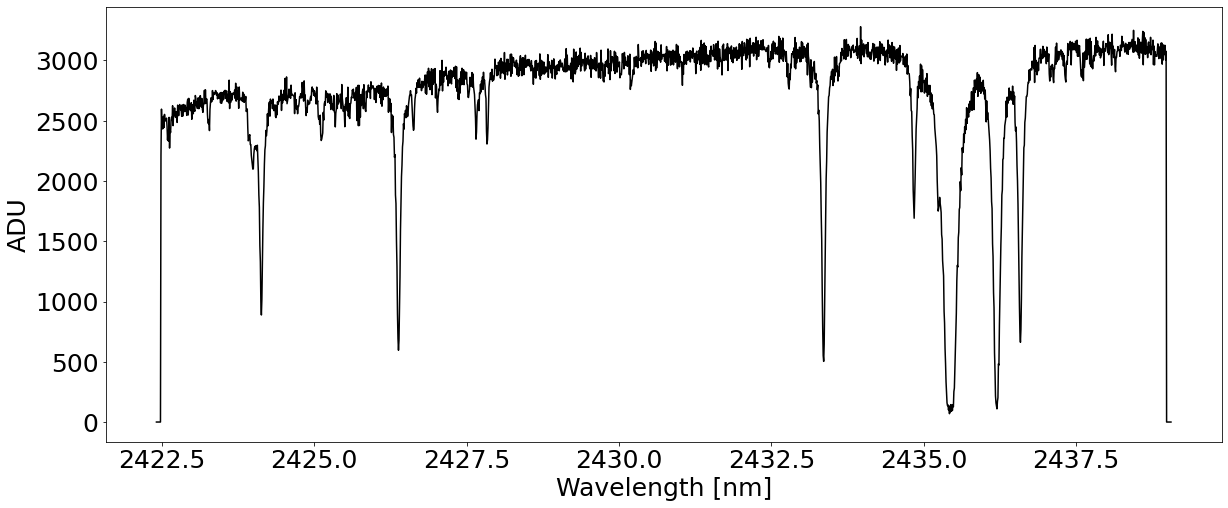

In [12]:
n = 0
plt.plot(WL[n], spec[n], 'k')
plt.xlabel(r'Wavelength [nm]')
plt.ylabel(r'ADU')

Text(0, 0.5, 'ADU')

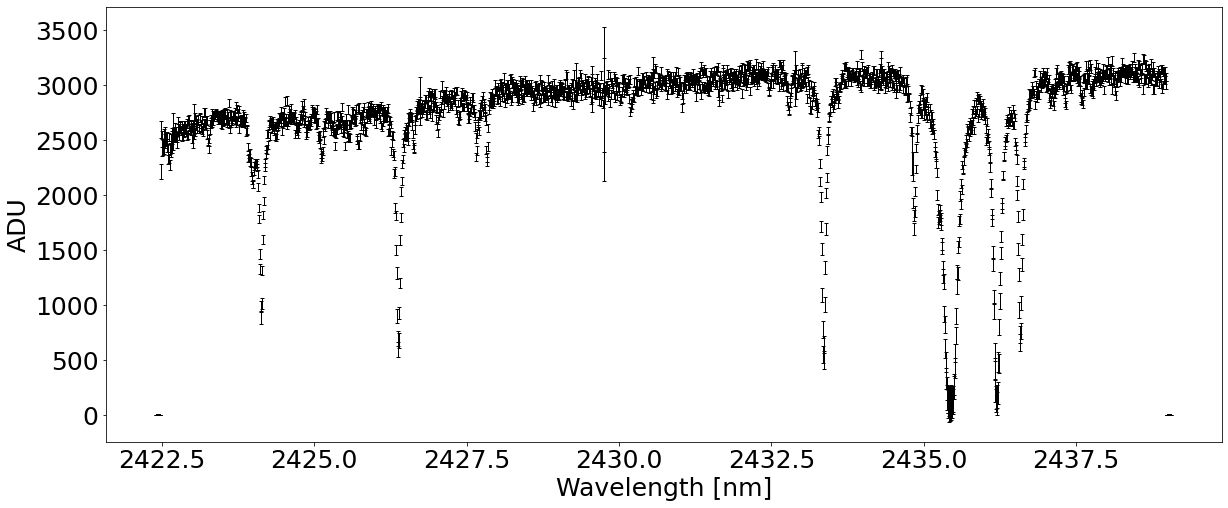

In [14]:
n = 0
plt.errorbar(WL[n], spec[n], yerr=error_spec[n], color ='k', fmt=',', capsize=2 , markersize=1, elinewidth=1)
#plt.ylim(2000,11000)
#plt.xlim(2382, 2384)
plt.xlabel(r'Wavelength [nm]')
plt.ylabel(r'ADU')

(0.0, 4000.0)

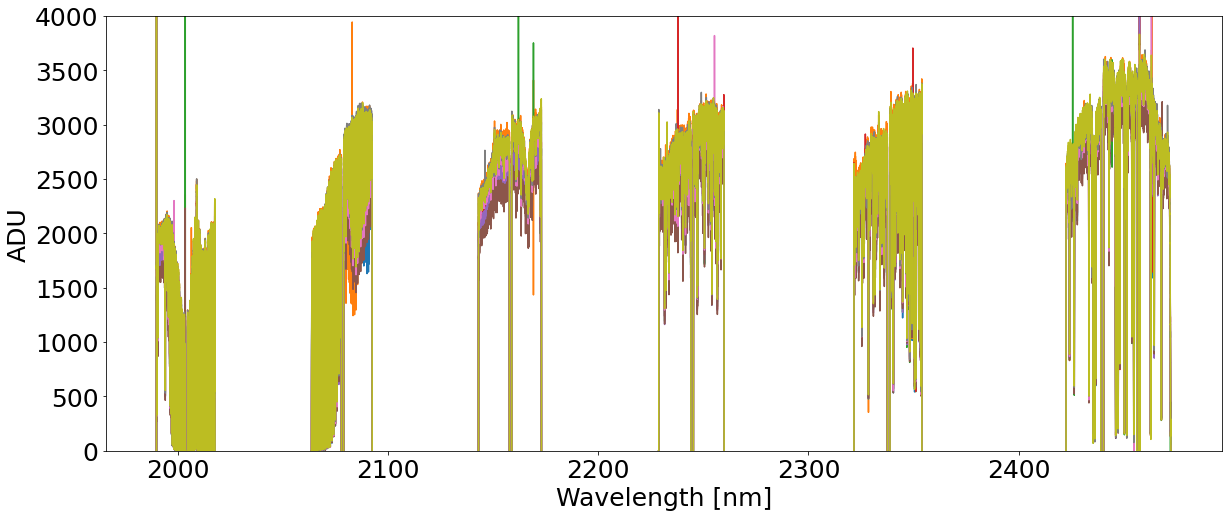

In [20]:
for frame in range(100):
    for i in range(21):
        plt.plot(frame_WL[frame][i], frame_spec[frame][i], 'C'+str(frame))
plt.xlabel(r'Wavelength [nm]')
plt.ylabel(r'ADU')
plt.ylim(-100, 4000)

#plt.ylim(2000,13000)
#plt.xlim(2382, 2384)

(-50.0, 4000.0)

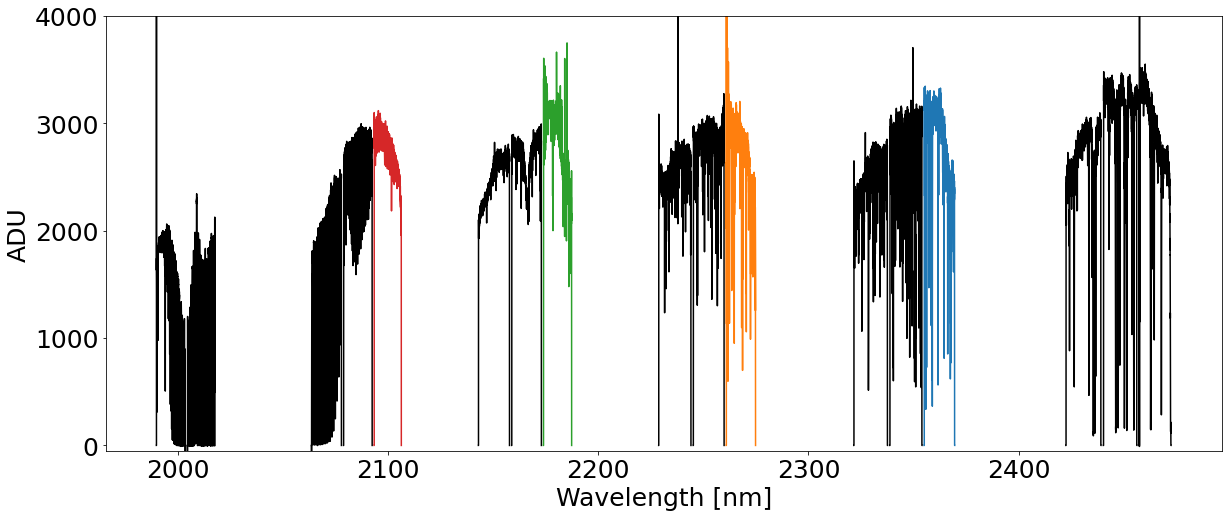

In [27]:
frame = 3
for i in range(13):  # data that is accesible
    plt.plot(frame_WL[frame][i], frame_spec[frame][i], 'k')
    
for i in range(4):   # data that is null
    plt.plot(frame_WL[frame][i+13], frame_spec[frame][i+13])
    #print(frame_WL[frame][i+13])
#plt.plot(frame_WL[frame][6], frame_spec[frame][6], 'g')
#plt.plot(frame_WL[frame][0], frame_spec[frame][0], 'r')

plt.xlabel(r'Wavelength [nm]')
plt.ylabel(r'ADU')
plt.ylim(-50, 4000)

Text(0, 0.5, 'ADU')

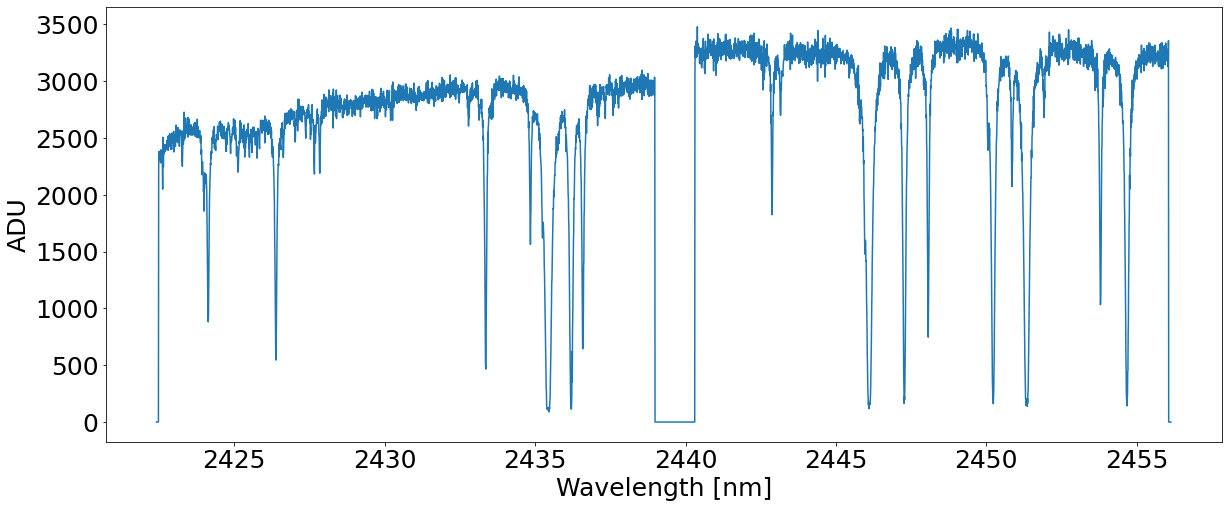

In [28]:
x = frame_WL[frame][0] + frame_WL[frame][6]
y = frame_spec[frame][0] + frame_spec[frame][6]
error = frame_error_spec[frame][0] + frame_error_spec[frame][6]

plt.plot(x,y)

plt.xlabel(r'Wavelength [nm]')
plt.ylabel(r'ADU')